In [104]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
!pip install linearmodels
from linearmodels import PanelOLS
from linearmodels import RandomEffects

import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization


from statsmodels.api import qqplot #for qq plot
from statsmodels.stats.diagnostic import het_breuschpagan,linear_rainbow  #variance equality and linearity tests
from scipy.stats import shapiro #for checking normality

In [105]:
data = pd.read_excel('data.xlsx')
data.head()


,marzname,marz,year,radianceoverpixels,summedradiance,population,radpop_scaled,average_expenditure,average_tot_income,consumption_per_adult_equivalent,headyears_educated,construction_mln_amd,hospital_visits_per_Capita,illegal_acts,total_credit_debt,total_debitory_debt,passenger_turnover,cargo_turnover
0,Armavir,1,2004,4.5,8469.5,256072.9,33.1,67657.8,69964.1,28084.7,9.7,NaN,NaN,595.0,NaN,NaN,NaN,NaN
1,Armavir,1,2005,4.6,8662.0,256143.6,33.8,64208.7,76897.8,29720.3,9.0,8509.0,1.9,594.0,8238.0,5780.0,78.0,4.1
2,Armavir,1,2006,5.1,9764.5,256214.3,38.1,75313.5,88649.5,85878.3,9.0,5031.0,2.3,537.0,8302.5,6370.0,63.9,14.8
3,Armavir,1,2007,6.0,11499.5,256285.1,44.9,101420.1,80827.9,119702.1,9.7,6376.0,2.5,470.0,8943.4,4227.6,36.8,20.1
4,Armavir,1,2008,7.3,13914.0,256355.8,54.3,108806.4,115331.6,127624.6,6.9,8228.0,2.7,493.0,13118.7,4895.8,49.8,20.2


In [106]:
data.shape

(110, 18)

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 18 columns):
marzname                            110 non-null object
marz                                110 non-null int64
year                                110 non-null int64
radianceoverpixels                  110 non-null float64
summedradiance                      110 non-null float64
population                          110 non-null float64
radpop_scaled                       110 non-null float64
average_expenditure                 110 non-null float64
average_tot_income                  110 non-null float64
consumption_per_adult_equivalent    110 non-null float64
headyears_educated                  110 non-null float64
construction_mln_amd                99 non-null float64
hospital_visits_per_Capita          99 non-null float64
illegal_acts                        109 non-null float64
total_credit_debt                   99 non-null float64
total_debitory_debt                 99 non-null 

In [108]:
data = data.fillna(method='bfill')

In [109]:
data_numeric = data.select_dtypes(exclude=["object"])

In [110]:
data_numeric.corr()

,marz,year,radianceoverpixels,summedradiance,population,radpop_scaled,average_expenditure,average_tot_income,consumption_per_adult_equivalent,headyears_educated,construction_mln_amd,hospital_visits_per_Capita,illegal_acts,total_credit_debt,total_debitory_debt,passenger_turnover,cargo_turnover
marz,1.000000,0.000000,0.397941,-0.235579,0.334474,-0.383306,0.325301,0.053870,0.088621,0.268090,0.468978,0.396551,0.402615,0.459334,0.487681,0.467325,0.488586
year,0.000000,1.000000,0.093055,0.475744,-0.013893,0.668018,0.724554,0.846740,0.007706,-0.724997,-0.009990,0.563958,0.165006,0.087579,0.096421,-0.001278,0.173347
radianceoverpixels,0.397941,0.093055,1.000000,0.477860,0.969570,-0.247864,0.439160,0.237151,0.116172,0.220782,0.896839,0.356507,0.953848,0.954946,0.967384,0.975885,0.822360
summedradiance,-0.235579,0.475744,0.477860,1.000000,0.471840,0.618792,0.375264,0.327337,0.006844,-0.324309,0.332255,0.249508,0.456035,0.377603,0.370985,0.378196,0.276988
population,0.334474,-0.013893,0.969570,0.471840,1.000000,-0.311322,0.297265,0.109705,0.084098,0.278001,0.897339,0.270576,0.920393,0.920916,0.926461,0.977437,0.756787
radpop_scaled,-0.383306,0.668018,-0.247864,0.618792,-0.311322,1.000000,0.340231,0.467944,-0.016908,-0.632825,-0.307766,0.178471,-0.254478,-0.304968,-0.310502,-0.339498,-0.262111
average_expenditure,0.325301,0.724554,0.439160,0.375264,0.297265,0.340231,1.000000,0.722010,0.322139,-0.348538,0.347826,0.602334,0.433369,0.426599,0.443899,0.359085,0.460416
average_tot_income,0.053870,0.846740,0.237151,0.327337,0.109705,0.467944,0.722010,1.000000,0.095348,-0.552833,0.161381,0.671005,0.275580,0.254747,0.282986,0.165750,0.389876
consumption_per_adult_equivalent,0.088621,0.007706,0.116172,0.006844,0.084098,-0.016908,0.322139,0.095348,1.000000,0.088303,0.191951,0.076119,0.021769,0.063652,0.101778,0.105580,0.133306
headyears_educated,0.268090,-0.724997,0.220782,-0.324309,0.278001,-0.632825,-0.348538,-0.552833,0.088303,1.000000,0.279949,-0.223460,0.164227,0.241611,0.255262,0.297246,0.212359


In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data_numeric.corr().abs().round(2),annot=True, cmap = "BuGn")
plt.show()

In [ ]:
sns.heatmap(data_numeric.corr().abs()>=0.75, cmap = "BuGn")
plt.show()

In [ ]:
# As can be seen on the heatmap, radiance over pixels is higly correlated with credit/debit debts, cargo and passenger turnover. Also, population is highly correlated with mentioned variables. Perhaps, it will be a good idea to get per capita figures for the mentioned variables. This is also because of the fact that summed radiance and per capita variance do not show high correlation with these variables. Also there is a correlation inbetween these variables themselves. Some of them should be removed. 

In [ ]:
data['total_debt']= data['total_credit_debt']+data['total_debitory_debt']
data['illegal_acts']=data['illegal_acts']/data['population']
data.info()


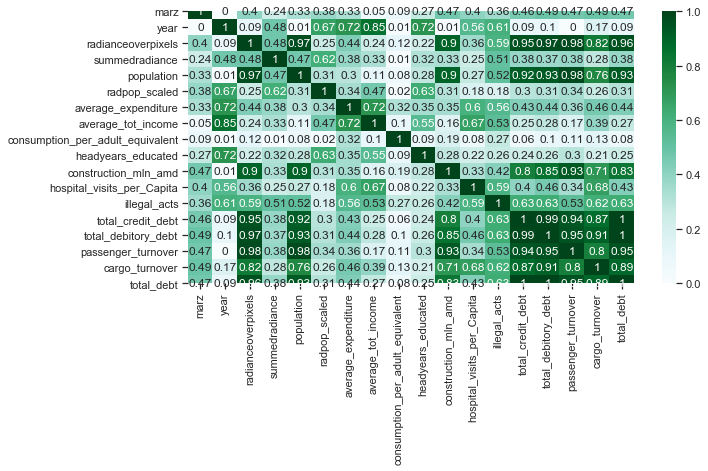

<Figure size 432x288 with 0 Axes>

In [57]:
data_numeric = data.select_dtypes(exclude=["object"]) 
data_numeric.corr()
plt.figure(figsize=(10,5))
sns.heatmap(data_numeric.corr().abs().round(2),annot=True, cmap = "BuGn")
plt.savefig("plots.png")


In [58]:
data= data.drop(['total_credit_debt', 'total_debitory_debt', 'construction_mln_amd'], axis=1)


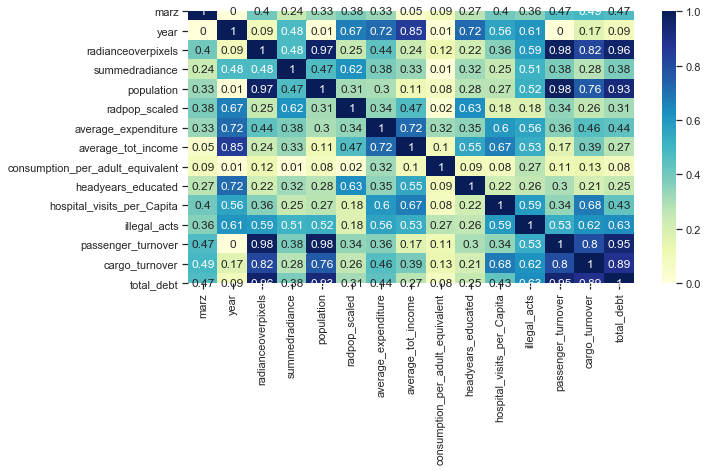

In [100]:
data_numeric = data.select_dtypes(exclude=["object"]) 
data_numeric.corr()
plt.figure(figsize=(10,5))
sns.heatmap(data_numeric.corr().abs().round(2),annot=True, cmap = "YlGnBu", color='green')
plt.savefig('baby.png')
plt.show()

In [60]:
data.columns

Index(['marzname', 'marz', 'year', 'radianceoverpixels', 'summedradiance',
       'population', 'radpop_scaled', 'average_expenditure',
       'average_tot_income', 'consumption_per_adult_equivalent',
       'headyears_educated', 'hospital_visits_per_Capita', 'illegal_acts',
       'passenger_turnover', 'cargo_turnover', 'total_debt'],
      dtype='object')

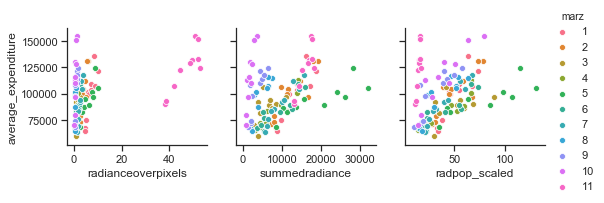

In [91]:
g = sns.pairplot(data,
                 x_vars=["radianceoverpixels", 'summedradiance', 'radpop_scaled'],
                 y_vars=['average_expenditure'], hue='marz')
plt.savefig('111.png')


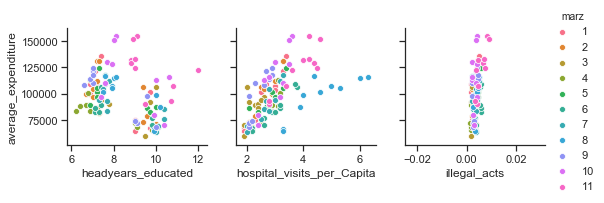

In [92]:
k = sns.pairplot(data,
                 x_vars=['headyears_educated', 'hospital_visits_per_Capita', 'illegal_acts'],
                 y_vars=['average_expenditure'], hue='marz')
plt.savefig('222.png')


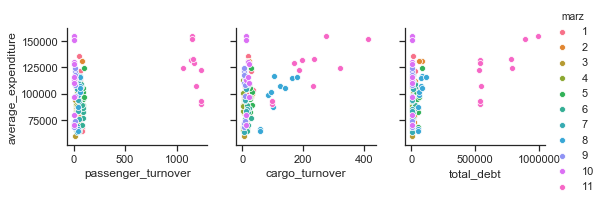

In [93]:
c = sns.pairplot(data,
                 x_vars=['passenger_turnover', 'cargo_turnover', 'total_debt'],
                 y_vars=['average_expenditure'], hue='marz')
plt.savefig('333.png')

In [103]:
with sns.color_palette("PuBuGn_d"):
sns.distplot(data.average_expenditure)
plt.title("Distribution of average_expenditure")

plt.savefig('aaaa.png')


IndentationError: expected an indented block (<ipython-input-103-301f80ca35b6>, line 2)

In [95]:
#the distribution is slightly right-skewed. 

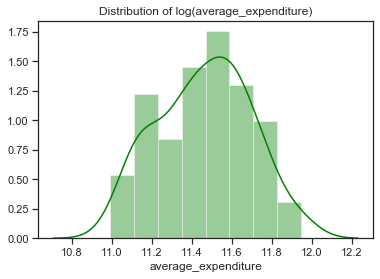

In [96]:
sns.distplot(np.log(data.average_expenditure),color="green")
plt.title("Distribution of log(average_expenditure)")
plt.savefig('bbbb.png')

In [18]:
#log distribution is normal
